<a href="https://colab.research.google.com/github/umartaimur10/MIMIC-III-Antibiotic-Usage-Analysis./blob/main/MIMIC-III-Antibiotic-Usage-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading clinical datasets...
✅ Dataset loaded successfully.

--- Route of Administration Breakdown ---
ROUTE
IV         5312
PO         2545
IV DRIP     828
SC          470
PO/NG       262
Name: count, dtype: int64


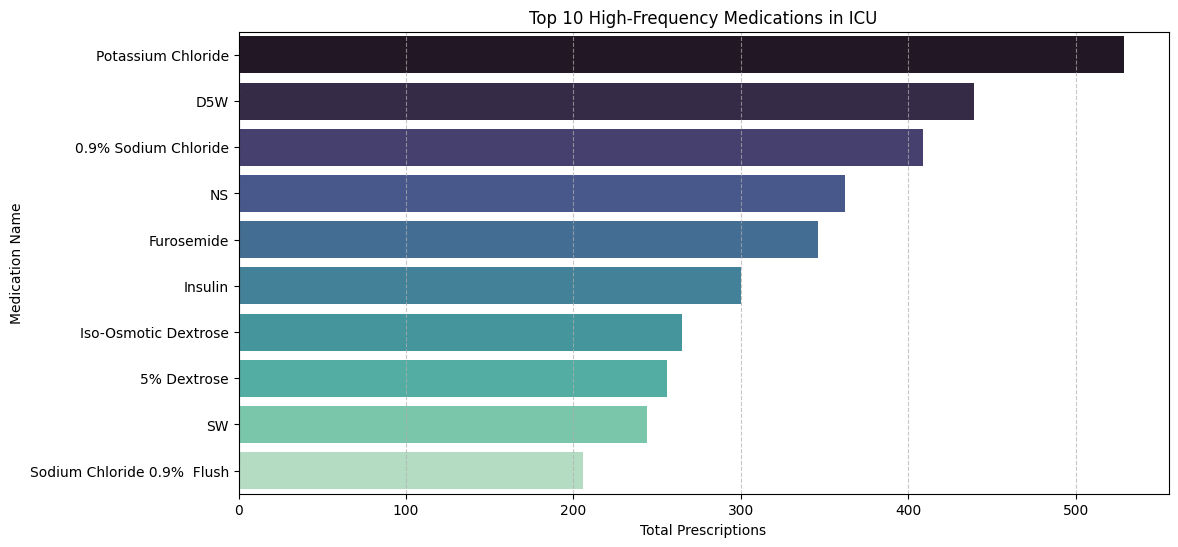


--- Mortality Overview (0=Survived, 1=Expired) ---
HOSPITAL_EXPIRE_FLAG
0    6816
1    3582
Name: count, dtype: int64


In [2]:
# Project: Analysis of Medication Usage in Critical Care (MIMIC-III)
# Author: Umar Taimur Tahir
# Objective: Identify high-frequency IV medications and correlate with patient outcomes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Ingestion ---
# Loading the standard MIMIC-III clinical tables
# We need both the orders (Prescriptions) and the outcomes (Admissions)
print("Loading clinical datasets...")
try:
    med_orders = pd.read_csv('PRESCRIPTIONS.csv')
    patient_outcomes = pd.read_csv('ADMISSIONS.csv')

    # Standardizing column headers to handle capitalization inconsistencies
    med_orders.columns = med_orders.columns.str.upper()
    patient_outcomes.columns = patient_outcomes.columns.str.upper()
    print("✅ Dataset loaded successfully.")

except FileNotFoundError:
    print("❌ Error: Clinical data files not found. Please upload PRESCRIPTIONS.csv and ADMISSIONS.csv.")

# --- 2. Cohort Selection ---
# As a pharmacist, I am specifically interested in the 'Route of Administration'
# Let's filter to see what routes are most common (IV vs Oral)
print("\n--- Route of Administration Breakdown ---")
route_counts = med_orders['ROUTE'].value_counts().head(5)
print(route_counts)

# --- 3. Drug Utilization Review (DUR) ---
# Identifying the top 10 most frequently administered medications in the ICU
common_meds = med_orders['DRUG'].value_counts().head(10)

# Visualizing the DUR results
plt.figure(figsize=(12, 6))

# FIXED CODE: Added 'hue' and 'legend=False' to remove the pink warning
sns.barplot(
    x=common_meds.values,
    y=common_meds.index,
    hue=common_meds.index,
    palette='mako',
    legend=False
)

plt.title('Top 10 High-Frequency Medications in ICU')
plt.xlabel('Total Prescriptions')
plt.ylabel('Medication Name')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Adding gridlines makes it look more scientific
plt.show()

# --- 4. Outcomes Analysis ---
# Merging prescription data with discharge status to analyze mortality trends
# Linking on 'HADM_ID' (Hospital Admission ID)
clinical_cohort = pd.merge(med_orders,
                           patient_outcomes[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']],
                           on='HADM_ID',
                           how='left')

# Quick check: How many patients expired in this cohort?
print("\n--- Mortality Overview (0=Survived, 1=Expired) ---")
print(clinical_cohort['HOSPITAL_EXPIRE_FLAG'].value_counts())